# Plant Disease Prediction

Dataset Link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

## Importing Libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Processing

### Training Image Preprocessing

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


### Validation Image Processing

In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


## Building Model

In [7]:
# Initialize the Sequential model
cnn = tf.keras.models.Sequential()

In [8]:
# Define the input shape
input_shape = [128, 128, 3]
cnn.add(tf.keras.layers.Input(shape=input_shape))

## Building Convolution Layer

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [10]:
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [11]:
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))


In [12]:
cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [13]:
cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [14]:
cnn.add(tf.keras.layers.Dropout(0.25))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=1500, activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.4))
cnn.add(tf.keras.layers.Dense(units=38, activation='softmax'))

## Compiling and Training Phase

In [15]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
            loss='categorical_crossentropy',
            metrics=['accuracy'])

In [16]:
cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# Training Phase
training_history = cnn.fit(x=training_set, validation_data=validation_set, epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3383s 2s/step - accuracy: 0.3951 - loss: 2.1349 - val_accuracy: 0.8263 - val_loss: 0.5546
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2346s 1s/step - accuracy: 0.8351 - loss: 0.5224 - val_accuracy: 0.9157 - val_loss: 0.2613
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2356s 1s/step - accuracy: 0.9032 - loss: 0.2960 - val_accuracy: 0.8988 - val_loss: 0.2975
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2360s 1s/step - accuracy: 0.9354 - loss: 0.1981 - val_accuracy: 0.9476 - val_loss: 0.1554
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2344s 1s/step - accuracy: 0.9527 - loss: 0.1449 - val_accuracy: 0.9572 - val_loss: 0.1298
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2337s 1s/step - accuracy: 0.9624 - loss: 0.1143 - val_accuracy: 0.9428 - val_loss: 0.1783
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2337s 1s/step - accuracy: 0.9721 - loss: 0.0875 - val_accuracy: 0.9521 - val_loss: 0.1616
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2340s 1s/step - accuracy: 0.9741 -

In [18]:
import json
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

## Evaluating Model

In [19]:
# Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 781s 356ms/step - accuracy: 0.9880 - loss: 0.0385
Training accuracy: 0.9895440936088562


In [20]:
# Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 ━━━━━━━━━━━━━━━━━━━━ 178s 323ms/step - accuracy: 0.9613 - loss: 0.1217
Validation accuracy: 0.9623264074325562


## Saving Model

In [21]:
cnn.save('trained_plant_disease_model.keras')

In [22]:
# Recording History in json
with open('training_hist.json', 'w') as f:
    json.dump(training_history.history, f)

In [23]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


## Accuracy Visualization

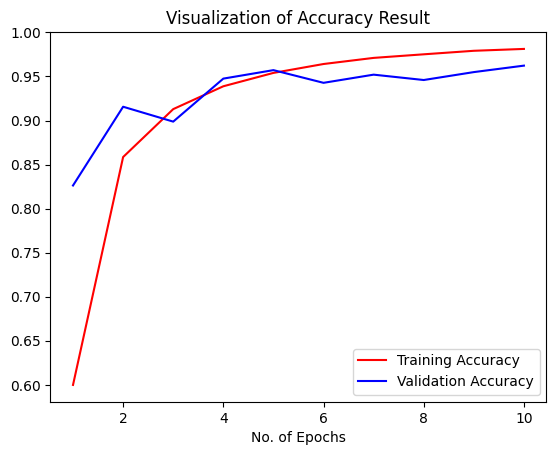

In [24]:
epochs = [i for i in range(1, 11)]
plt.plot(epochs, training_history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

## Some other metrics for model evaluation

In [25]:
class_name = validation_set.class_names

## Load test set for evaluation

In [26]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

print(Y_true)
print(predicted_categories)

Found 17572 files belonging to 38 classes.
17572/17572 ━━━━━━━━━━━━━━━━━━━━ 267s 15ms/step
tf.Tensor([ 0  0  0 ... 37 37 37], shape=(17572,), dtype=int64)
tf.Tensor([ 0  0  0 ... 37 37 37], shape=(17572,), dtype=int64)


In [27]:
# Precision, Recall, F-score
print(classification_report(Y_true, predicted_categories, target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.96      0.95      0.95       504
                                 Apple___Black_rot       1.00      0.96      0.98       497
                          Apple___Cedar_apple_rust       0.97      0.98      0.97       440
                                   Apple___healthy       0.96      0.91      0.93       502
                               Blueberry___healthy       0.98      0.97      0.97       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.98      0.99       421
                 Cherry_(including_sour)___healthy       0.97      1.00      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.95      0.85      0.89       410
                       Corn_(maize)___Common_rust_       0.97      1.00      0.98       477
               Corn_(maize)___Northern_Leaf_Blight       0.92      0.97      0.

In [28]:
cm = confusion_matrix(Y_true, predicted_categories)

<Axes: >

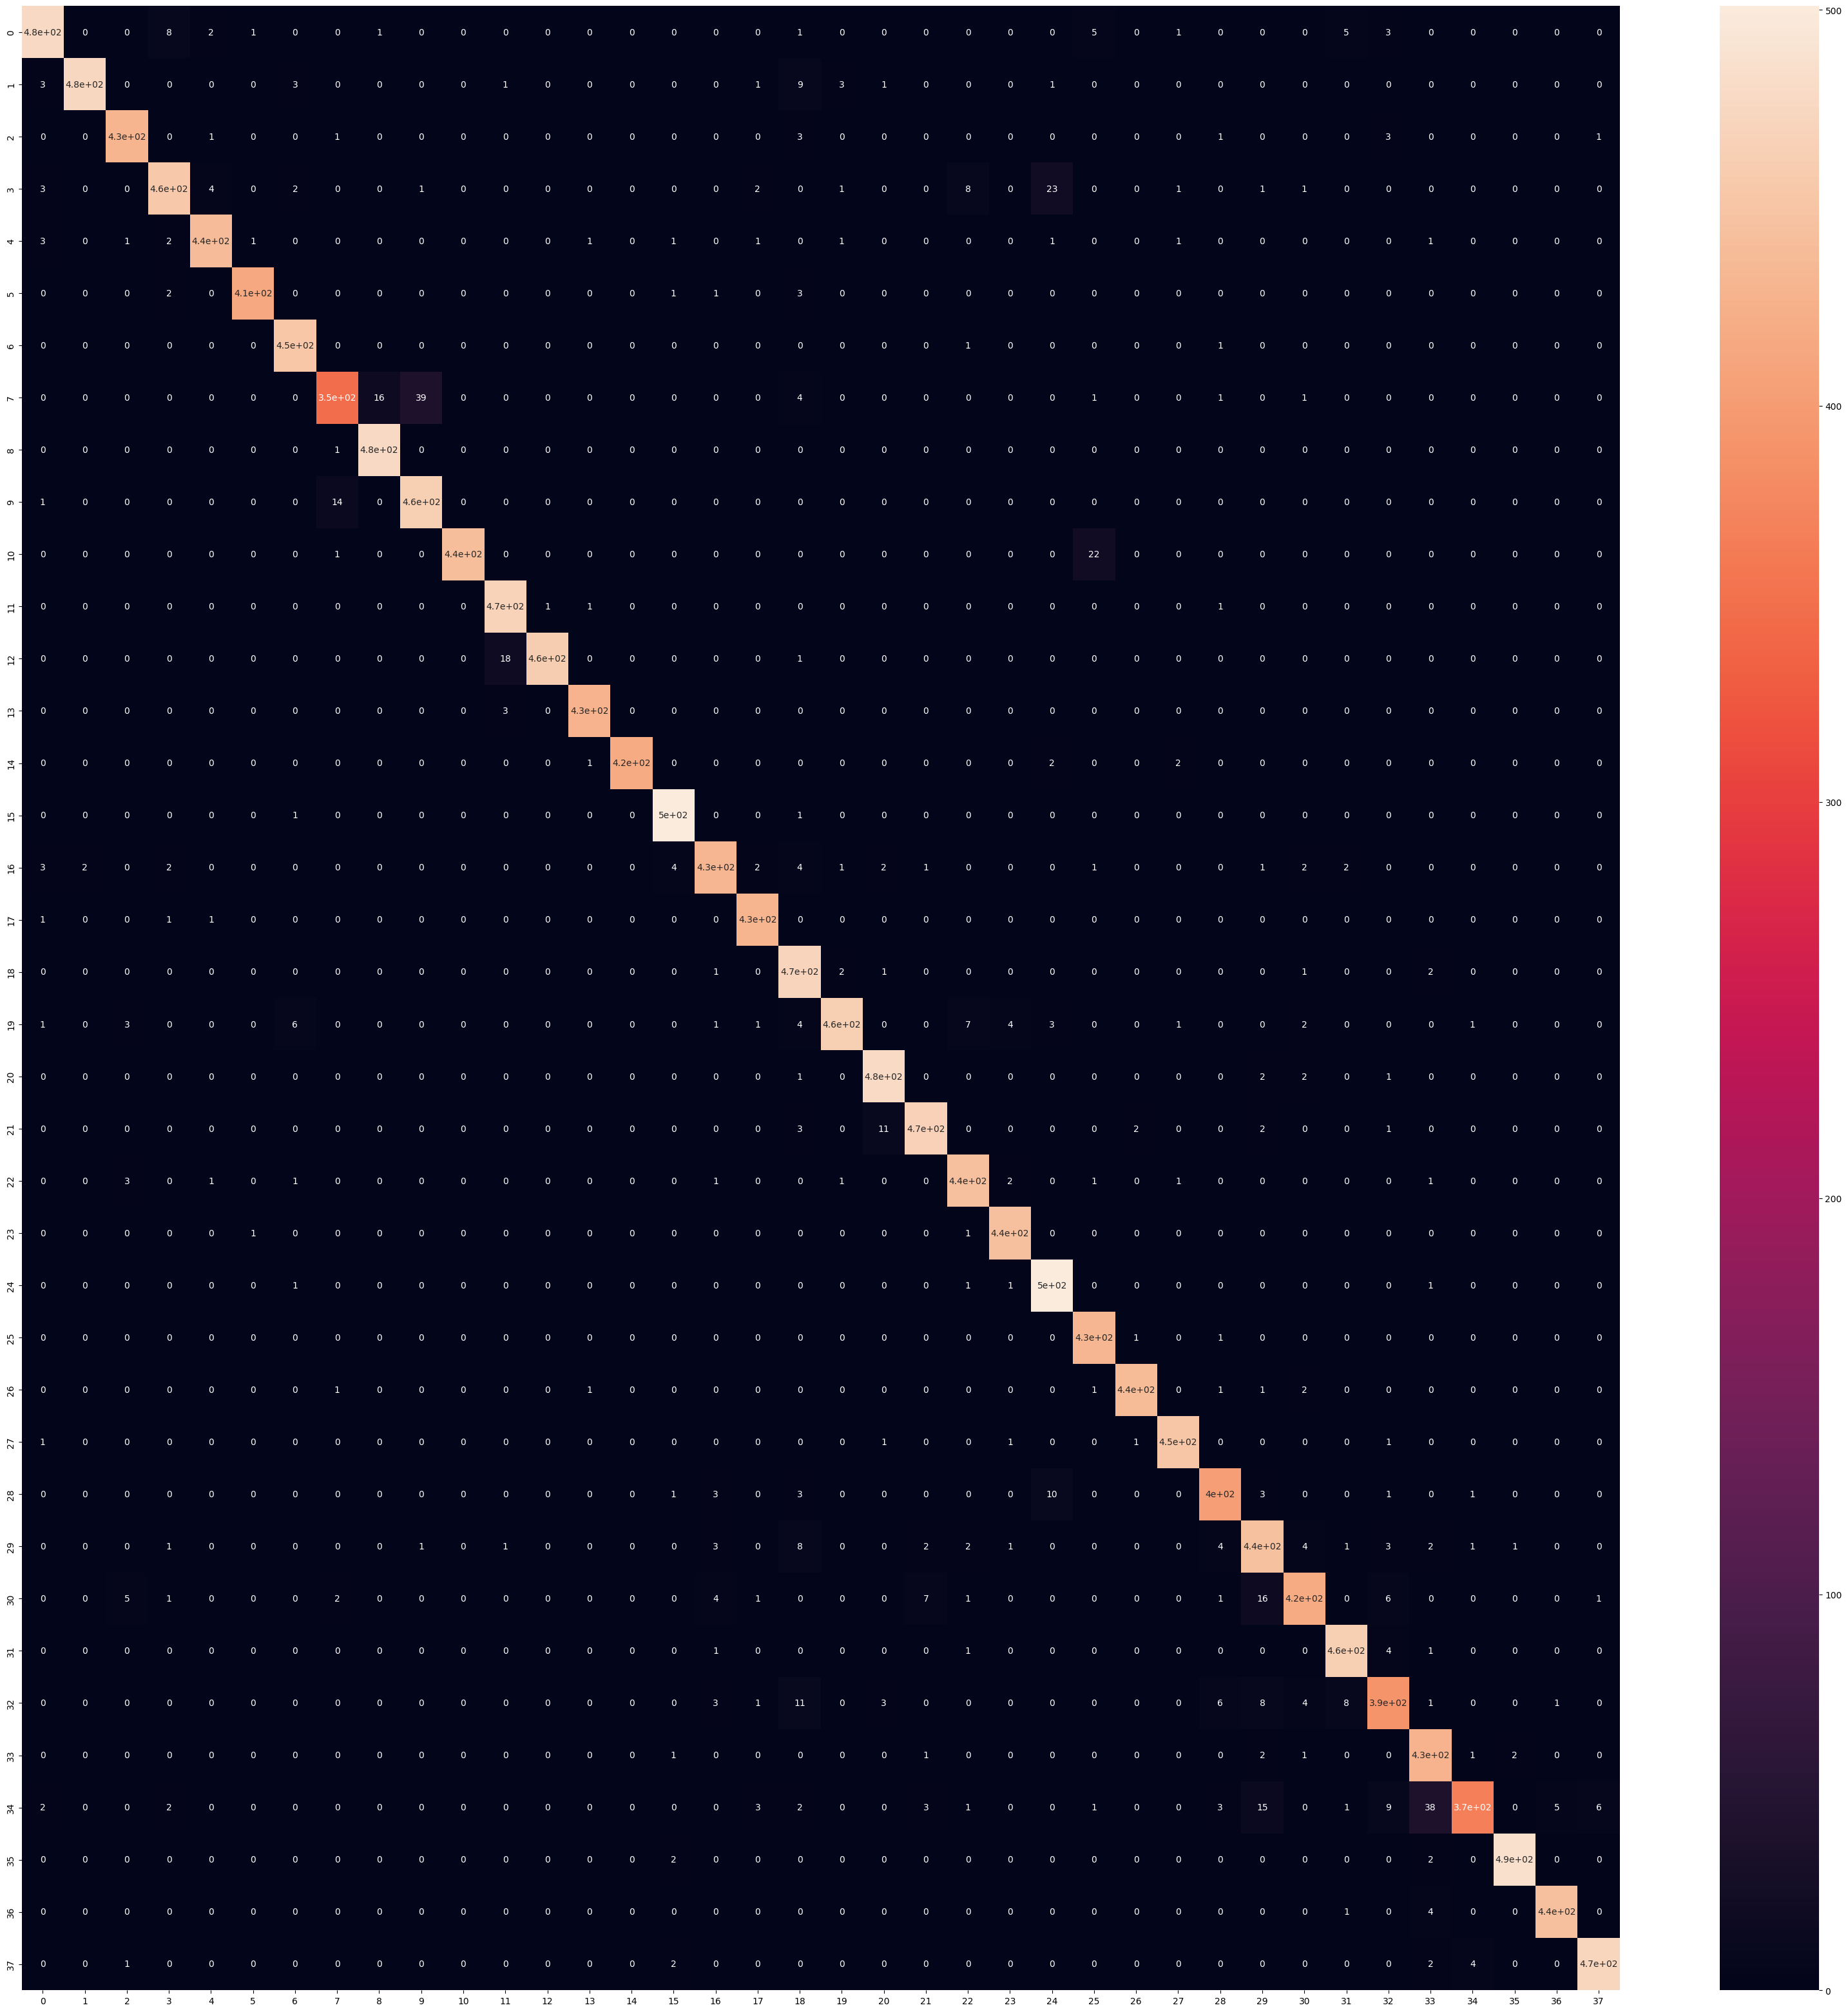

In [29]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm, annot=True, annot_kws={"size": 10})

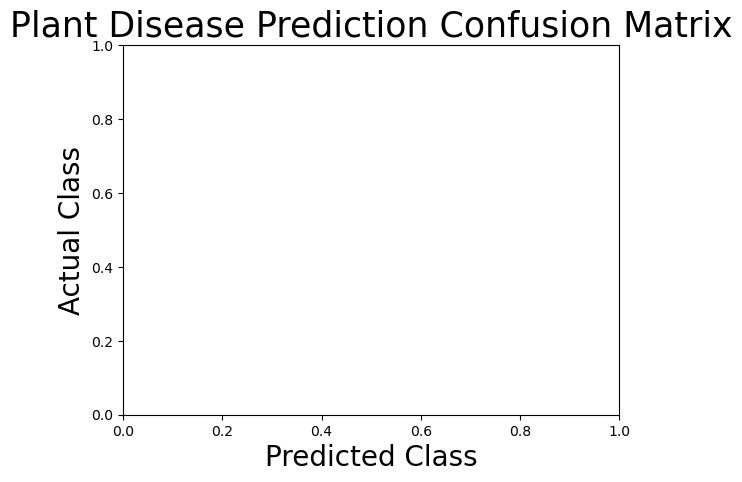

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

plt.xlabel('Predicted Class', fontsize=20)
plt.ylabel('Actual Class', fontsize=20)
plt.title('Plant Disease Prediction Confusion Matrix', fontsize=25)
plt.show()